<a href="https://colab.research.google.com/github/victor-roris/ML-learning/blob/master/ComputerVision/DocBank_Transformers_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DocBank - Inference using Transformers

DocBank is a new large-scale dataset that is constructed using a weak supervision approach. It enables models to integrate both the textual and layout information for downstream tasks. The current DocBank dataset totally includes 500K document pages.

This notebook is basis in the issue: https://github.com/doc-analysis/DocBank/issues/14

In [ ]:
!pip install pdfplumber
!pip install pdf2image
!apt-get install poppler-utils
!pip install simpletransformers

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

## Get model

DocBank has a list of pretrained models using the dataset. This models are available in the [Model Zoo website](https://github.com/doc-analysis/DocBank/blob/master/MODEL_ZOO.md).

To upload it to google colab I am going to use my google drive. To do that, previously I downloaded the model and I uploded to my google drive.

In this notebook we are going to use the `BERT-base` model but this code should be
valid for all the models provided by Transformers (i.e., BERT and RoBERTa).

NOTE: the list of labels are available in [this link](https://github.com/doc-analysis/DocBank/blob/master/labels.txt)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/models/bert_base_500k_epoch_1.zip .
!unzip bert_base_500k_epoch_1.zip
!ls bert_base_500k_epoch_1

Archive:  bert_base_500k_epoch_1.zip
   creating: bert_base_500k_epoch_1/
  inflating: bert_base_500k_epoch_1/config.json  
  inflating: bert_base_500k_epoch_1/pytorch_model.bin  
  inflating: bert_base_500k_epoch_1/special_tokens_map.json  
  inflating: bert_base_500k_epoch_1/test_results.txt  
 extracting: bert_base_500k_epoch_1/tokenizer_config.json  
  inflating: bert_base_500k_epoch_1/training_args.bin  
  inflating: bert_base_500k_epoch_1/vocab.txt  
config.json	   special_tokens_map.json  tokenizer_config.json  vocab.txt
pytorch_model.bin  test_results.txt	    training_args.bin


## Get test image

This models use as input an image of document page.

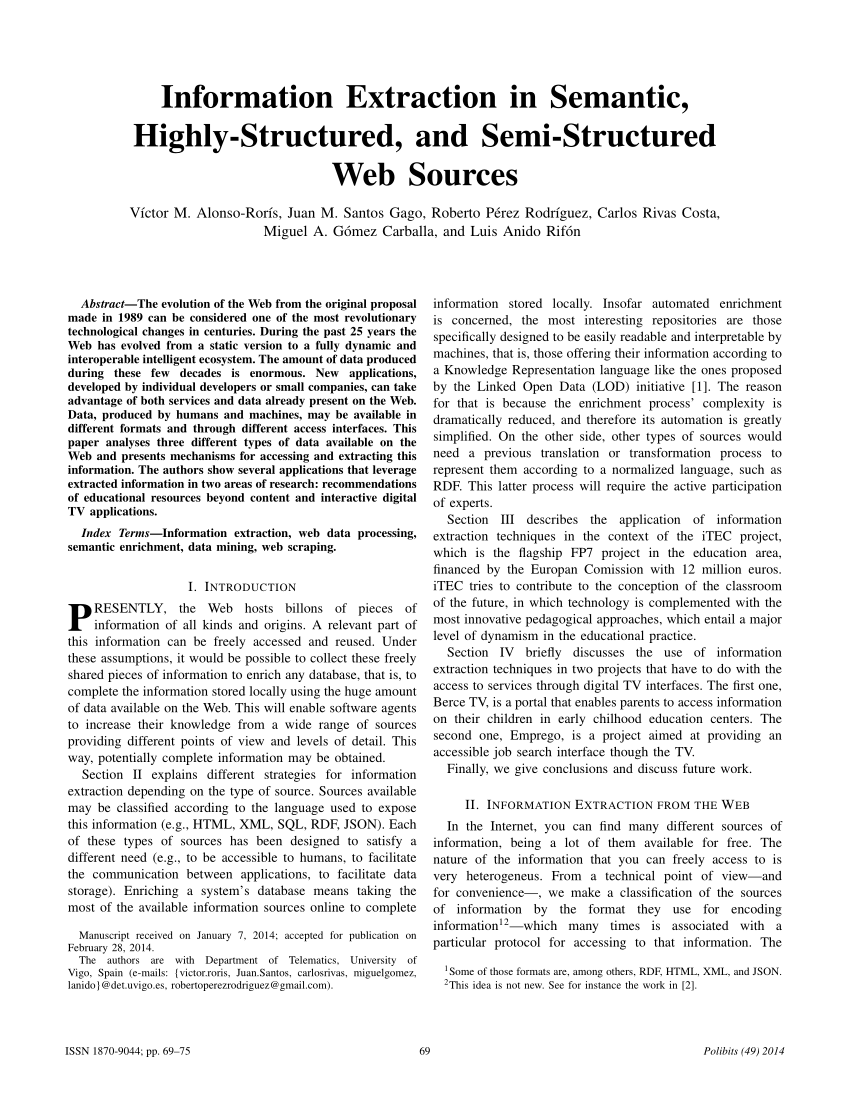

In [61]:
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# !wget https://i1.rgstatic.net/publication/316448042_Machine_Learning_With_Big_Data_Challenges_and_Approaches/links/5915a79d4585152e199f5b4f/largepreview.png -q -O input.jpg
!wget https://i1.rgstatic.net/publication/265172391_Information_Extraction_in_Semantic_Highly-Structured_and_Semi-Structured_Web_Sources/links/5d9a4cb3a6fdccfd0e7ef333/largepreview.png -q -O input.jpg
# !wget https://raw.githubusercontent.com/doc-analysis/DocBank/master/DocBank_samples/DocBank_samples/10.tar_1701.04170.gz_TPNL_afterglow_evo_8.jpg -q -O input.jpg
# !wget https://raw.githubusercontent.com/doc-analysis/DocBank/master/DocBank_samples/DocBank_samples/100.tar_1705.04261.gz_main_11.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

## Prediction

To use the Transformer models we need use as input the text of the document image. 

To extract the text from the image we use the tool [pytesseract](https://github.com/madmaze/pytesseract)

In [62]:
try:
 from PIL import Image
except ImportError:
 import Image

ocrtext = pytesseract.image_to_string(Image.open("./input.jpg"))
print(ocrtext)

Information Extraction in Semantic,
Highly-Structured, and Semi-Structured
Web Sources

Victor M. Alonso-Roris, Juan M. Santos Gago, Roberto Pérez Rodriguez, Carlos Rivas Costa,
Miguel A. Gémez Carballa, and Luis Anido Rifon

Abstract—The evolution of the Web from the original proposal
made in 1989 can be considered one of the most revolutionary
technological changes in cent ing the past 25 years the
‘Web has evolved from a static version to a fully dynamic and
interoperable intelligent ecosystem. The amount of data produced
during these few decades is enormous. New applications,
developed by individual developers or small companies, can take
advantage of both services and data already present on the Web.
Data, produced by humans and machines, may be available
different formats and through different access

paper analyses three different types of data a
‘Web and presents mechanisms for accessing and extract
information. The authors show several applications that leverage
extracted info

### Simpletransformer

Simpletransformer is a library that simplify of the Transformer library of HuggingFace.

In [63]:
from simpletransformers import ner
import pytesseract
import json

# Load the model configuration file
with open("bert_base_500k_epoch_1/config.json") as f:
    config = json.load(f)

# Define the arguments of the model
model_args = ner.NERArgs()
model_args.config = config
# Labels from: https://github.com/doc-analysis/DocBank/blob/master/labels.txt
model_args.labels_list = ["abstract", "author", "caption", "date", "equation",
                          "figure", "footer", "list", "paragraph", "reference",
                          "section", "table", "title"]


# Define the simpletransformer model
model = ner.NERModel(
    'bert',
    'bert_base_500k_epoch_1',
    args=model_args,
    use_cuda=False
)

Prediction

In [64]:
predictions, raw_outputs = model.predict([ocrtext])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
predictions

[[{'Information': 'paragraph'},
  {'Extraction': 'paragraph'},
  {'in': 'paragraph'},
  {'Semantic,': 'paragraph'},
  {'Highly-Structured,': 'paragraph'},
  {'and': 'paragraph'},
  {'Semi-Structured': 'paragraph'},
  {'Web': 'paragraph'},
  {'Sources': 'paragraph'},
  {'Victor': 'paragraph'},
  {'M.': 'paragraph'},
  {'Alonso-Roris,': 'paragraph'},
  {'Juan': 'paragraph'},
  {'M.': 'paragraph'},
  {'Santos': 'paragraph'},
  {'Gago,': 'paragraph'},
  {'Roberto': 'paragraph'},
  {'Pérez': 'paragraph'},
  {'Rodriguez,': 'paragraph'},
  {'Carlos': 'paragraph'},
  {'Rivas': 'paragraph'},
  {'Costa,': 'paragraph'},
  {'Miguel': 'paragraph'},
  {'A.': 'paragraph'},
  {'Gémez': 'paragraph'},
  {'Carballa,': 'paragraph'},
  {'and': 'paragraph'},
  {'Luis': 'paragraph'},
  {'Anido': 'paragraph'},
  {'Rifon': 'paragraph'},
  {'Abstract—The': 'paragraph'},
  {'evolution': 'paragraph'},
  {'of': 'paragraph'},
  {'the': 'paragraph'},
  {'Web': 'paragraph'},
  {'from': 'paragraph'},
  {'the': 'paragr

In [66]:
raw_outputs

[[{'Information': [[-2.157037,
     -3.8430855,
     1.0991427,
     -6.330574,
     1.180574,
     -6.897267,
     -1.1432323,
     2.62808,
     4.6358466,
     -2.9272614,
     -1.5708393,
     -0.34797755,
     -5.334924]]},
  {'Extraction': [[-2.0309317,
     -3.73504,
     1.1089692,
     -6.3617797,
     1.1539884,
     -7.009049,
     -1.0906228,
     2.6574767,
     4.7101994,
     -2.9103732,
     -1.6846327,
     -0.47114515,
     -5.3378243]]},
  {'in': [[-2.027791,
     -3.8212852,
     1.1103132,
     -6.491309,
     0.6790313,
     -7.0478506,
     -0.8844504,
     2.8583426,
     4.8720345,
     -2.9626293,
     -1.5824474,
     -0.6027208,
     -5.3573055]]},
  {'Semantic,': [[-2.038888,
     -3.6619265,
     1.3143378,
     -6.284009,
     0.55004966,
     -6.8400345,
     -0.92373794,
     2.6745663,
     4.698098,
     -2.6961381,
     -1.8238739,
     -0.39562622,
     -5.204591],
    [-2.0983946,
     -3.7913907,
     1.4682418,
     -6.4316897,
     0.6314562,
  

## Transformers

In [67]:
from transformers import BertTokenizer, BertForTokenClassification
import torch
import pandas as pd

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForTokenClassification.from_pretrained("bert_base_500k_epoch_1")
model.eval()

sample_input = tokenizer(ocrtext, return_tensors="pt", max_length=512)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [68]:
logits = model(**sample_input)

In [69]:
logits

TokenClassifierOutput([('logits',
                        tensor([[[ 2.8240, -1.3063, -2.0762,  ..., -0.1242, -2.5421, -2.9497],
                                 [-1.7290,  0.3381, -1.5825,  ..., -1.9518, -1.1167,  8.5502],
                                 [-1.6707,  0.2876, -1.5532,  ..., -2.0136, -1.1435,  8.5636],
                                 ...,
                                 [-0.2837,  0.6399, -1.2478,  ..., -0.7941, -2.3042, -3.2940],
                                 [-0.3343,  0.4633, -1.1311,  ..., -0.8046, -2.1642, -3.2801],
                                 [ 5.6497, -0.6185, -2.7155,  ..., -1.4078, -2.6839, -2.1739]]],
                               grad_fn=<AddBackward0>))])

In [70]:
predictions = torch.argmax(logits[0], dim=-1)
predictions

labels = ["abstract", "author", "caption", "date", "equation",
                          "figure", "footer", "list", "paragraph", "reference",
                          "section", "table", "title"]

label_predictions = []
for pred in predictions[0].tolist():
  label_predictions.append(labels[pred])

print(predictions)
print(label_predictions)

tensor([[ 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,

In [71]:
len(label_predictions)

512

In [72]:
len(sample_input['input_ids'][0])

512

In [73]:
tokenizer.decode(sample_input['input_ids'][0])

'[CLS] information extraction in semantic, highly - structured, and semi - structured web sources victor m. alonso - roris, juan m. santos gago, roberto perez rodriguez, carlos rivas costa, miguel a. gemez carballa, and luis anido rifon abstract — the evolution of the web from the original proposal made in 1989 can be considered one of the most revolutionary technological changes in cent ing the past 25 years the ‘ web has evolved from a static version to a fully dynamic and interoperable intelligent ecosystem. the amount of data produced during these few decades is enormous. new applications, developed by individual developers or small companies, can take advantage of both services and data already present on the web. data, produced by humans and machines, may be available different formats and through different access paper analyses three different types of data a ‘ web and presents mechanisms for accessing and extract information. the authors show several applications that leverage 

In [80]:
for idx, tok in enumerate(sample_input['input_ids'][0].tolist()):
  print(idx, " - ", tokenizer.decode([tok]) , "\t\t : " + label_predictions[idx] )

0  -  [CLS] 		 : paragraph
1  -  information 		 : title
2  -  extraction 		 : title
3  -  in 		 : title
4  -  semantic 		 : title
5  -  , 		 : title
6  -  highly 		 : title
7  -  - 		 : title
8  -  structured 		 : title
9  -  , 		 : title
10  -  and 		 : title
11  -  semi 		 : title
12  -  - 		 : title
13  -  structured 		 : title
14  -  web 		 : title
15  -  sources 		 : title
16  -  victor 		 : author
17  -  m 		 : author
18  -  . 		 : author
19  -  alonso 		 : author
20  -  - 		 : author
21  -  ro 		 : author
22  -  ##ris 		 : author
23  -  , 		 : author
24  -  juan 		 : author
25  -  m 		 : author
26  -  . 		 : author
27  -  santos 		 : author
28  -  gag 		 : author
29  -  ##o 		 : author
30  -  , 		 : author
31  -  roberto 		 : author
32  -  perez 		 : author
33  -  rodriguez 		 : author
34  -  , 		 : author
35  -  carlos 		 : author
36  -  ri 		 : author
37  -  ##vas 		 : author
38  -  costa 		 : author
39  -  , 		 : author
40  -  miguel 		 : author
41  -  a 		 : author
42  -  . 

As it is explained in the issue: https://github.com/doc-analysis/DocBank/issues/14, the majority of the text is going to be predicted as `paragraph`.

To avoid losing text in the model prediction, for the max_seq_length, the author advice is to split all the tokens of a page into several sequences to avoid the length exceeding it.